<a href="https://colab.research.google.com/github/sifatk/machine_learning/blob/main/US_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [2]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [3]:
import os
os.makedirs("/content/dataset")

In [4]:
! sudo cp -v -r "/mydrive/Dataset/us_accident.zip" "/content/dataset"


'/mydrive/Dataset/us_accident.zip' -> '/content/dataset/us_accident.zip'


In [5]:
! unzip /content/dataset/us_accident.zip  -d /content/dataset/


Archive:  /content/dataset/us_accident.zip
  inflating: /content/dataset/US_Accidents_Dec21_updated.csv  


In [6]:
import torch
import os
from random import choice
import shutil

from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import cv2

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping



from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, roc_curve
from sklearn.naive_bayes import CategoricalNB, BernoulliNB, MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
import sklearn.metrics as metrics
from sklearn.ensemble import VotingClassifier
from imblearn.over_sampling import SMOTE


import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional


%matplotlib inline


In [7]:
df = pd.read_csv("/content/dataset/US_Accidents_Dec21_updated.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [8]:
df.describe

<bound method NDFrame.describe of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0     

In [ ]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [9]:
unneeded_columns = ['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country']

df = df.drop(unneeded_columns, axis=1)

In [10]:
print("Total missing values:", df.isna().sum())


Total missing values: Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Number                   1743911
Side                           0
County                         0
State                          0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit              

In [11]:
df = df.dropna(axis=0).reset_index(drop=True)

In [12]:
df.isna().sum()

Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Number                   0
Side                     0
County                   0
State                    0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
S

In [13]:
# Cast Start_Time to datetime
df["Start_Time"] = pd.to_datetime(df["Start_Time"])

# Extract year, month, weekday and day
df["Year"] = df["Start_Time"].dt.year
df["Month"] = df["Start_Time"].dt.month
df["Weekday"] = df["Start_Time"].dt.weekday
df["Day"] = df["Start_Time"].dt.day

# Extract hour and minute
df["Hour"] = df["Start_Time"].dt.hour
df["Minute"] = df["Start_Time"].dt.minute

In [14]:
df = df.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

In [ ]:
df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,County,State,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,4,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,R,Jay,IN,...,Night,Day,Day,Day,2016,2,1,9,18,20
1,4,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,R,Jay,IN,...,Night,Day,Day,Day,2016,2,1,9,18,20
2,4,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,R,Van Wert,OH,...,Night,Night,Night,Day,2016,2,2,10,6,18
3,2,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,L,Crawford,PA,...,Day,Day,Day,Day,2016,2,2,10,8,35
4,2,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,L,Cuyahoga,OH,...,Day,Day,Day,Day,2016,2,2,10,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943314,3,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,R,San Mateo,CA,...,Day,Day,Day,Day,2019,8,4,23,16,19
943315,4,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,R,Sutter,CA,...,Day,Day,Day,Day,2019,8,4,23,17,25
943316,4,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,R,Sutter,CA,...,Day,Day,Day,Day,2019,8,4,23,17,25
943317,3,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,L,San Bernardino,CA,...,Night,Night,Night,Night,2019,8,4,23,1,16


In [15]:
unique_weather = df["Weather_Condition"].unique()

print(len(unique_weather))
print(unique_weather)

91
['Light Snow' 'Mostly Cloudy' 'Partly Cloudy' 'Overcast' 'Snow' 'Fair'
 'Cloudy' 'Light Freezing Drizzle' 'Light Rain' 'Light Freezing Rain'
 'Clear' 'Light Rain with Thunder' 'Fog' 'Light Drizzle' 'Heavy Rain'
 'Rain' 'Blowing Snow' 'Light Ice Pellets' 'Haze' 'Thunderstorms and Rain'
 'Drizzle' 'T-Storm' 'Rain / Windy' 'Partly Cloudy / Windy'
 'Thunder in the Vicinity' 'Scattered Clouds' 'Fair / Windy' 'Heavy Snow'
 'Light Rain / Windy' 'Smoke' 'Light Freezing Fog' 'Mostly Cloudy / Windy'
 'Heavy Thunderstorms and Rain' 'Heavy T-Storm / Windy' 'Cloudy / Windy'
 'Thunder' 'N/A Precipitation' 'Heavy T-Storm' 'Shallow Fog' 'Mist'
 'Snow / Windy' 'Light Snow / Windy' 'Light Snow and Sleet'
 'T-Storm / Windy' 'Showers in the Vicinity' 'Patches of Fog' 'Wintry Mix'
 'Heavy Rain / Windy' 'Haze / Windy' 'Snow and Sleet' 'Thunder / Windy'
 'Heavy Drizzle' 'Light Rain Shower' 'Blowing Dust / Windy'
 'Drizzle and Fog' 'Fog / Windy' 'Heavy Snow / Windy' 'Light Snow Shower'
 'Light Sleet / Wind

In [16]:
df.loc[df["Weather_Condition"].str.contains("Thunder|T-Storm", na=False), "Weather_Condition"] = "Thunderstorm"
df.loc[df["Weather_Condition"].str.contains("Snow|Sleet|Wintry", na=False), "Weather_Condition"] = "Snow"
df.loc[df["Weather_Condition"].str.contains("Rain|Drizzle|Shower", na=False), "Weather_Condition"] = "Rain"
df.loc[df["Weather_Condition"].str.contains("Wind|Squalls", na=False), "Weather_Condition"] = "Windy"
df.loc[df["Weather_Condition"].str.contains("Hail|Pellets", na=False), "Weather_Condition"] = "Hail"
df.loc[df["Weather_Condition"].str.contains("Fair", na=False), "Weather_Condition"] = "Clear"
df.loc[df["Weather_Condition"].str.contains("Cloud|Overcast", na=False), "Weather_Condition"] = "Cloudy"
df.loc[df["Weather_Condition"].str.contains("Mist|Haze|Fog", na=False), "Weather_Condition"] = "Fog"
df.loc[df["Weather_Condition"].str.contains("Sand|Dust", na=False), "Weather_Condition"] = "Sand"
df.loc[df["Weather_Condition"].str.contains("Smoke|Volcanic Ash", na=False), "Weather_Condition"] = "Smoke"
df.loc[df["Weather_Condition"].str.contains("N/A Precipitation", na=False), "Weather_Condition"] = np.nan

print(df["Weather_Condition"].unique())

['Snow' 'Cloudy' 'Clear' 'Rain' 'Thunderstorm' 'Fog' 'Hail' 'Windy'
 'Smoke' nan 'Sand']


In [17]:
df.loc[df["Wind_Direction"] == "CALM", "Wind_Direction"] = "Calm"
df.loc[df["Wind_Direction"] == "VAR", "Wind_Direction"] = "Variable"
df.loc[df["Wind_Direction"] == "East", "Wind_Direction"] = "E"
df.loc[df["Wind_Direction"] == "North", "Wind_Direction"] = "N"
df.loc[df["Wind_Direction"] == "South", "Wind_Direction"] = "S"
df.loc[df["Wind_Direction"] == "West", "Wind_Direction"] = "W"

df["Wind_Direction"] = df["Wind_Direction"].map(lambda x : x if len(x) != 3 else x[1:], na_action="ignore")

df["Wind_Direction"].unique()

array(['NW', 'W', 'SW', 'N', 'NE', 'SE', 'S', 'Variable', 'Calm', 'E'],
      dtype=object)

In [ ]:
df 

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,County,State,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,4,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,R,Jay,IN,...,Night,Day,Day,Day,2016,2,1,9,18,20
1,4,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,R,Jay,IN,...,Night,Day,Day,Day,2016,2,1,9,18,20
2,4,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,R,Van Wert,OH,...,Night,Night,Night,Day,2016,2,2,10,6,18
3,2,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,L,Crawford,PA,...,Day,Day,Day,Day,2016,2,2,10,8,35
4,2,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,L,Cuyahoga,OH,...,Day,Day,Day,Day,2016,2,2,10,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943314,3,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,R,San Mateo,CA,...,Day,Day,Day,Day,2019,8,4,23,16,19
943315,4,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,R,Sutter,CA,...,Day,Day,Day,Day,2019,8,4,23,17,25
943316,4,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,R,Sutter,CA,...,Day,Day,Day,Day,2019,8,4,23,17,25
943317,3,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,L,San Bernardino,CA,...,Night,Night,Night,Night,2019,8,4,23,1,16


In [18]:
df.isna().sum()

Severity                   0
Start_Lat                  0
Start_Lng                  0
End_Lat                    0
End_Lng                    0
Distance(mi)               0
Number                     0
Side                       0
County                     0
State                      0
Timezone                   0
Airport_Code               0
Temperature(F)             0
Wind_Chill(F)              0
Humidity(%)                0
Pressure(in)               0
Visibility(mi)             0
Wind_Direction             0
Wind_Speed(mph)            0
Precipitation(in)          0
Weather_Condition        284
Amenity                    0
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset

In [19]:
df = df.dropna(axis=0).reset_index(drop=True)

In [ ]:
df['Severity']

0         4
1         4
2         4
3         2
4         2
         ..
943030    3
943031    4
943032    4
943033    3
943034    3
Name: Severity, Length: 943035, dtype: int64

# Encoding

In [20]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Side', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [21]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column] == 'object'}

{'Side': 2,
 'County': 1411,
 'State': 49,
 'Timezone': 4,
 'Airport_Code': 1678,
 'Wind_Direction': 10,
 'Weather_Condition': 10,
 'Sunrise_Sunset': 2,
 'Civil_Twilight': 2,
 'Nautical_Twilight': 2,
 'Astronomical_Twilight': 2}

In [22]:
for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    df[i]= en.fit_transform(df[i])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943035 entries, 0 to 943034
Data columns (total 44 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Severity               943035 non-null  int64  
 1   Start_Lat              943035 non-null  float64
 2   Start_Lng              943035 non-null  float64
 3   End_Lat                943035 non-null  float64
 4   End_Lng                943035 non-null  float64
 5   Distance(mi)           943035 non-null  float64
 6   Number                 943035 non-null  float64
 7   Side                   943035 non-null  int64  
 8   County                 943035 non-null  int64  
 9   State                  943035 non-null  int64  
 10  Timezone               943035 non-null  int64  
 11  Airport_Code           943035 non-null  int64  
 12  Temperature(F)         943035 non-null  float64
 13  Wind_Chill(F)          943035 non-null  float64
 14  Humidity(%)            943035 non-nu

In [24]:
df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,County,State,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,4,40.451120,-85.150480,40.354290,-85.149930,6.690,9001.0,1,632,13,...,1,0,0,0,2016,2,1,9,18,20
1,4,40.354290,-85.149930,40.451120,-85.150480,6.690,473.0,1,632,13,...,1,0,0,0,2016,2,1,9,18,20
2,4,40.728130,-84.789650,40.745590,-84.789620,1.206,12998.0,1,1304,33,...,1,1,1,0,2016,2,2,10,6,18
3,2,41.831930,-80.101430,41.841490,-80.110990,0.824,25529.0,0,316,36,...,0,0,0,0,2016,2,2,10,8,35
4,2,41.483390,-81.662970,41.476920,-81.660750,0.462,3937.0,0,333,33,...,0,0,0,0,2016,2,2,10,12,54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943030,3,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,1,1121,3,...,0,0,0,0,2019,8,4,23,16,19
943031,4,38.995930,-121.672020,39.003170,-121.662679,0.708,3044.0,1,1235,3,...,0,0,0,0,2019,8,4,23,17,25
943032,4,39.003170,-121.662679,38.995930,-121.672020,0.708,2500.0,1,1235,3,...,0,0,0,0,2019,8,4,23,17,25
943033,3,34.121320,-117.254540,34.121320,-117.254540,0.000,1498.0,0,1115,3,...,1,1,1,1,2019,8,4,23,1,16


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


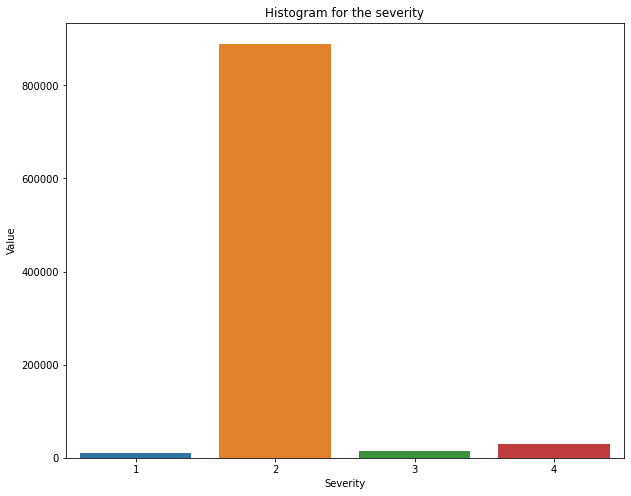

In [25]:
severity_counts = df["Severity"].value_counts()
plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

# OutLier

In [26]:
cols_with_outliers = ['Distance(mi)','Wind_Chill(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)','Precipitation(in)']

In [27]:
def remove_outliers(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    column = column[((Q1 - 1.5 * IQR) <= column) & (column  <= (Q3 + 1.5 * IQR))]
    return column

In [28]:
for col in cols_with_outliers:
    df[col] = remove_outliers(df[col])

In [29]:
df.isna().sum()

Severity                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)              96897
Number                        0
Side                          0
County                        0
State                         0
Timezone                      0
Airport_Code                  0
Temperature(F)                0
Wind_Chill(F)             10797
Humidity(%)                   0
Pressure(in)              77309
Visibility(mi)           161577
Wind_Direction                0
Wind_Speed(mph)           16540
Precipitation(in)         55400
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway                       0
Roundabout                    0
Station                       0
Stop                          0
Traffic_

In [30]:
df = df.dropna(axis=0).reset_index(drop=True)

# Feature Scaling

In [31]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1)

In [32]:
y.unique()


array([2, 4, 3, 1])

In [33]:
y=y-1

In [34]:
X = X.astype(np.float)

<ipython-input-34-33fba77a450b>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = X.astype(np.float)


In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


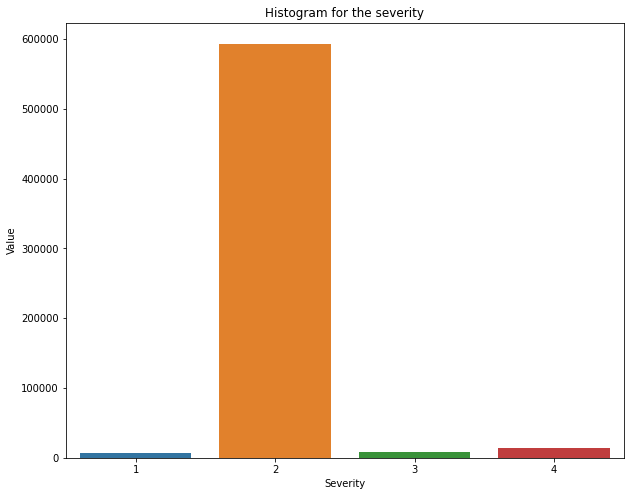

In [36]:
severity_counts = df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

In [37]:
df.isna().sum()

Severity                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Number                   0
Side                     0
County                   0
State                    0
Timezone                 0
Airport_Code             0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
Station                  0
Stop                     0
Traffic_Calming          0
Traffic_Signal           0
Turning_Loop             0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
A

# Smot

In [38]:
smote = SMOTE(sampling_strategy='minority')


X_sm, y_sm = smote.fit_resample(X, y)

# nearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
  
X_sm, y_sm = nr.fit_resample(X,y.ravel())

In [ ]:
print("After Undersampling, counts of label '0': {}".format(sum(y_sm == 0)))
print("After Undersampling, counts of label '1': {}".format(sum(y_sm == 1)))
print("After Undersampling, counts of label '2': {}".format(sum(y_sm == 2)))
print("After Undersampling, counts of label '3': {}".format(sum(y_sm == 3)))

After Undersampling, counts of label '0': 7242
After Undersampling, counts of label '1': 7242
After Undersampling, counts of label '2': 7242
After Undersampling, counts of label '3': 7242


In [ ]:
print( y_sm.value_counts)

AttributeError: ignored

In [ ]:
severity_counts = y_sm.value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(severity_counts.index, severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

AttributeError: ignored

# Spliting

In [ ]:
df

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Side,County,State,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,Weekday,Day,Hour,Minute
0,2,38.826530,-120.030110,38.832616,-120.035640,0.515,21111.0,0,405,3,...,0,0,0,0,2016,4,6,24,15,55
1,4,35.691160,-121.289500,35.695743,-121.293199,0.379,16463.0,0,1120,3,...,0,0,0,0,2016,5,2,25,16,16
2,2,34.583175,-118.343213,34.583166,-118.343323,0.006,36867.0,0,738,3,...,1,1,1,0,2016,3,1,29,20,36
3,2,34.583166,-118.343323,34.583294,-118.341778,0.088,36865.0,0,738,3,...,1,1,1,0,2016,3,1,29,20,36
4,2,33.880116,-116.991175,33.883945,-116.990732,0.266,16301.0,0,1074,3,...,0,0,0,0,2016,4,4,1,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623216,2,46.131980,-123.376140,46.131332,-123.375192,0.064,91198.0,0,288,35,...,0,0,0,0,2019,8,4,23,18,12
623217,2,44.555972,-123.412453,44.555765,-123.412156,0.020,24188.0,0,99,35,...,0,0,0,0,2019,8,4,23,18,45
623218,2,37.573253,-122.340625,37.573813,-122.341380,0.057,2.0,1,1121,3,...,0,0,0,0,2019,8,4,23,14,44
623219,3,37.609816,-122.493720,37.608821,-122.495261,0.109,895.0,1,1121,3,...,0,0,0,0,2019,8,4,23,16,19


In [39]:
X_sm_samples, y_sm_samples =  make_classification(n_samples=100000, n_features=44,
                                        n_informative=4, n_redundant=0,random_state=0,n_classes=4 ,shuffle=True)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_sm_samples, y_sm_samples, test_size=0.2, stratify=y_sm_samples, random_state=100)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.1, stratify=y_sm)

In [ ]:

_, X, _, y = train_test_split(\
  X_sm_samples, y_sm_samples, test_size=0.01, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(\
  X_sm_samples, y_sm_samples, test_size=0.30, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=100)

In [ ]:
X_train.shape

(80000, 44)

# RNN

# New Section

In [ ]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [ ]:
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)

(80000, 44, 1) (80000,) (20000, 44, 1) (20000,)


In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10)


Epoch 1/10
14833/14833 [==============================] - 3006s 202ms/step - loss: 0.4901 - accuracy: 0.4245
Epoch 2/10
14833/14833 [==============================] - 3011s 203ms/step - loss: 0.2878 - accuracy: 0.4660
Epoch 3/10
14833/14833 [==============================] - 3025s 204ms/step - loss: 0.2161 - accuracy: 0.4777
Epoch 4/10
14833/14833 [==============================] - 3031s 204ms/step - loss: 0.1775 - accuracy: 0.4834
Epoch 5/10
14833/14833 [==============================] - 3048s 206ms/step - loss: 0.1525 - accuracy: 0.4867
Epoch 6/10
14833/14833 [==============================] - 3043s 205ms/step - loss: 0.1354 - accuracy: 0.4887
Epoch 7/10
14833/14833 [==============================] - 3061s 206ms/step - loss: 0.1232 - accuracy: 0.4899
Epoch 8/10
12958/14833 [=========================>....] - ETA: 6:26 - loss: 0.1139 - accuracy: 0.4909

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(64, return_sequences=True, input_shape=(1,X_train.shape[2])))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
625/625 [==============================] - 13s 10ms/step - loss: 1.0721 - accuracy: 0.3039
Epoch 2/50
625/625 [==============================] - 7s 11ms/step - loss: 0.7274 - accuracy: 0.3476
Epoch 3/50
625/625 [==============================] - 6s 10ms/step - loss: 0.6506 - accuracy: 0.3635
Epoch 4/50
625/625 [==============================] - 6s 10ms/step - loss: 0.5956 - accuracy: 0.3757
Epoch 5/50
625/625 [==============================] - 7s 10ms/step - loss: 0.5198 - accuracy: 0.3995
Epoch 6/50
625/625 [==============================] - 8s 13ms/step - loss: 0.4707 - accuracy: 0.4134
Epoch 7/50
625/625 [==============================] - 6s 10ms/step - loss: 0.4360 - accuracy: 0.4229
Epoch 8/50
625/625 [==============================] - 6s 10ms/step - loss: 0.4103 - accuracy: 0.4285
Epoch 9/50
625/625 [==============================] - 6s 10ms/step - loss: 0.3893 - accuracy: 0.4340
Epoch 10/50
625/625 [==============================] - 6s 10ms/step - loss: 0.3781 - accur

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error', metrics=['accuracy'])
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
625/625 [==============================] - 61s 91ms/step - loss: 1.2419 - accuracy: 0.2508
Epoch 2/50
625/625 [==============================] - 60s 97ms/step - loss: 1.1667 - accuracy: 0.2531
Epoch 3/50
625/625 [==============================] - 60s 96ms/step - loss: 1.1289 - accuracy: 0.2584
Epoch 4/50
625/625 [==============================] - 61s 97ms/step - loss: 1.1035 - accuracy: 0.2648
Epoch 5/50
625/625 [==============================] - 59s 94ms/step - loss: 1.0895 - accuracy: 0.2698
Epoch 6/50
625/625 [==============================] - 59s 95ms/step - loss: 1.0666 - accuracy: 0.2760
Epoch 7/50
625/625 [==============================] - 59s 94ms/step - loss: 1.0373 - accuracy: 0.2817
Epoch 8/50
625/625 [==============================] - 61s 97ms/step - loss: 1.0037 - accuracy: 0.2873
Epoch 9/50
625/625 [==============================] - 59s 95ms/step - loss: 0.9680 - accuracy: 0.2946
Epoch 10/50
625/625 [==============================] - 59s 95ms/step - loss: 0.933

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=128)

Epoch 1/50
625/625 [==============================] - 65s 97ms/step - loss: 1.2640 - accuracy: 0.2496
Epoch 2/50
625/625 [==============================] - 60s 97ms/step - loss: 1.1808 - accuracy: 0.2517
Epoch 3/50
625/625 [==============================] - 61s 97ms/step - loss: 1.1352 - accuracy: 0.2566
Epoch 4/50
625/625 [==============================] - 63s 100ms/step - loss: 1.0995 - accuracy: 0.2626
Epoch 5/50
625/625 [==============================] - 60s 97ms/step - loss: 1.0743 - accuracy: 0.2696
Epoch 6/50
625/625 [==============================] - 61s 97ms/step - loss: 1.0418 - accuracy: 0.2776
Epoch 7/50
625/625 [==============================] - 61s 97ms/step - loss: 0.9969 - accuracy: 0.2877
Epoch 8/50
625/625 [==============================] - 64s 102ms/step - loss: 0.9536 - accuracy: 0.2968
Epoch 9/50
625/625 [==============================] - 62s 99ms/step - loss: 0.9069 - accuracy: 0.3054
Epoch 10/50
625/625 [==============================] - 61s 98ms/step - loss: 0.8

In [ ]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
2500/2500 [==============================] - 193s 74ms/step - loss: 1.2055
Epoch 2/50
2500/2500 [==============================] - 183s 73ms/step - loss: 1.1261
Epoch 3/50
2500/2500 [==============================] - 189s 75ms/step - loss: 1.0883
Epoch 4/50
2500/2500 [==============================] - 185s 74ms/step - loss: 1.0211
Epoch 5/50
2500/2500 [==============================] - 190s 76ms/step - loss: 0.8967
Epoch 6/50
2500/2500 [==============================] - 184s 74ms/step - loss: 0.7641
Epoch 7/50
2500/2500 [==============================] - 190s 76ms/step - loss: 0.6922
Epoch 8/50
2500/2500 [==============================] - 187s 75ms/step - loss: 0.6482
Epoch 9/50
2500/2500 [==============================] - 188s 75ms/step - loss: 0.6088
Epoch 10/50
2500/2500 [==============================] - 185s 74ms/step - loss: 0.6009
Epoch 11/50
2500/2500 [==============================] - 195s 78ms/step - loss: 0.5558
Epoch 12/50
2500/2500 [=============================

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(16))
model.add(Dense(8))
model.add(Dense(4))


# Compile the model1
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=100)

KeyError: ignored

# Voting

In [ ]:
# Voting Classifier with soft voting.
vot_soft = VotingClassifier(estimators= [('RFC', RandomForestClassifier()),('SVC',
                                         svm.SVC(kernel='poly',probability=True)),
                                         ('KNN',KNeighborsClassifier(leaf_size=60))], voting ='soft' )
params = {'RFC__n_estimators': [10, 100],
      'SVC__C': [2,3],
      'SVC__kernel':['linear','sigmoid','poly'],
      'KNN__algorithm':["kd_tree","ball_tree"]}
rsk = GridSearchCV(estimator=vot_soft, param_grid=params)

rsk.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[('RFC',
                                                     RandomForestClassifier()),
                                                    ('SVC',
                                                     SVC(kernel='poly',
                                                         probability=True)),
                                                    ('KNN',
                                                     KNeighborsClassifier(leaf_size=60))],
                                        voting='soft'),
             param_grid={'KNN__algorithm': ['kd_tree', 'ball_tree'],
                         'RFC__n_estimators': [10, 100], 'SVC__C': [2, 3],
                         'SVC__kernel': ['linear', 'sigmoid', 'poly']},
             verbose=1)

In [ ]:
print("Train score:", rsk.score(X_train, y_train))
print("Validation score:", rsk.score(X_test, y_test))

Train score: 0.94125
Validation score: 0.716


In [ ]:
# Voting Classifier with hard voting.
vot_hard = VotingClassifier(estimators= [('RFC', RandomForestClassifier()),('SVC',
                                         svm.SVC(kernel='poly',probability=True)),
                                         ('KNN',KNeighborsClassifier(leaf_size=60))], voting ='hard' )
params = {'RFC__n_estimators': [10, 100],
      'SVC__C': [2,3],
      'SVC__kernel':['sigmoid','poly'],
      'KNN__algorithm':["kd_tree","ball_tree"]}
rsk2 = GridSearchCV(estimator=vot_hard, param_grid=params)

rsk2.fit(X_train, y_train)

GridSearchCV(estimator=VotingClassifier(estimators=[('RFC',
                                                     RandomForestClassifier()),
                                                    ('SVC',
                                                     SVC(kernel='poly',
                                                         probability=True)),
                                                    ('KNN',
                                                     KNeighborsClassifier(leaf_size=60))]),
             param_grid={'KNN__algorithm': ['kd_tree', 'ball_tree'],
                         'RFC__n_estimators': [10, 100], 'SVC__C': [2, 3],
                         'SVC__kernel': ['sigmoid', 'poly']})

In [ ]:
print("Train score:", rsk2.score(X_train, y_train))
print("Validation score:", rsk2.score(X_test, y_test))

Train score: 0.98975
Validation score: 0.72


In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(512, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)


outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

batch_size =512
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=batch_size,
    epochs=epochs,
   
)

Epoch 1/30
2596/2596 [==============================] - 40s 15ms/step - loss: 0.4061 - accuracy: 0.8403 - val_loss: 0.2541 - val_accuracy: 0.9078
Epoch 2/30
2596/2596 [==============================] - 38s 15ms/step - loss: 0.2144 - accuracy: 0.9231 - val_loss: 0.1961 - val_accuracy: 0.9309
Epoch 3/30
2596/2596 [==============================] - 39s 15ms/step - loss: 0.1646 - accuracy: 0.9426 - val_loss: 0.1694 - val_accuracy: 0.9412
Epoch 4/30
2596/2596 [==============================] - 38s 15ms/step - loss: 0.1398 - accuracy: 0.9521 - val_loss: 0.1332 - val_accuracy: 0.9553
Epoch 5/30
2596/2596 [==============================] - 41s 16ms/step - loss: 0.1231 - accuracy: 0.9584 - val_loss: 0.1235 - val_accuracy: 0.9592
Epoch 6/30
2596/2596 [==============================] - 39s 15ms/step - loss: 0.1109 - accuracy: 0.9631 - val_loss: 0.1179 - val_accuracy: 0.9609
Epoch 7/30
2596/2596 [==============================] - 39s 15ms/step - loss: 0.1024 - accuracy: 0.9664 - val_loss: 0.1138 -

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)


outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    
)

batch_size = 512
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=batch_size,
    epochs=epochs,
    
)

Epoch 1/50
2596/2596 [==============================] - 14s 5ms/step - loss: 0.4971 - accuracy: 0.8008 - val_loss: 0.4119 - val_accuracy: 0.8385
Epoch 2/50
2596/2596 [==============================] - 14s 6ms/step - loss: 0.3795 - accuracy: 0.8524 - val_loss: 0.3699 - val_accuracy: 0.8557
Epoch 3/50
2596/2596 [==============================] - 13s 5ms/step - loss: 0.3460 - accuracy: 0.8668 - val_loss: 0.3333 - val_accuracy: 0.8729
Epoch 4/50
2596/2596 [==============================] - 13s 5ms/step - loss: 0.3252 - accuracy: 0.8756 - val_loss: 0.3201 - val_accuracy: 0.8766
Epoch 5/50
2596/2596 [==============================] - 12s 5ms/step - loss: 0.3102 - accuracy: 0.8820 - val_loss: 0.3073 - val_accuracy: 0.8838
Epoch 6/50
2596/2596 [==============================] - 12s 5ms/step - loss: 0.2994 - accuracy: 0.8867 - val_loss: 0.2975 - val_accuracy: 0.8871
Epoch 7/50
2596/2596 [==============================] - 13s 5ms/step - loss: 0.2908 - accuracy: 0.8904 - val_loss: 0.2883 - val_ac

# SMOT CNN

# Spliting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)


In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(80000, 44) (80000,)
(20000, 44) (20000,)


In [ ]:
# Metrics dictionary
accuracy = dict()
precision = dict()
recall = dict()
f1 = dict()
fpr = dict()
tpr = dict()

# Training Models

In [ ]:
model = LogisticRegression(random_state=42, n_jobs=-1)
model.fit(X_train,y_train)

print("Train score:", model.score(X_train, y_train))
print("Validation score:", model.score(X_test, y_test))


Train score: 0.6173875
Validation score: 0.61305


In [ ]:
y_pred = model.predict(X_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61     20007
           1       0.70      0.77      0.73     19997
           2       0.62      0.64      0.63     19994
           3       0.52      0.44      0.48     20002

    accuracy                           0.62     80000
   macro avg       0.61      0.62      0.61     80000
weighted avg       0.61      0.62      0.61     80000

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      5002
           1       0.70      0.76      0.73      4999
           2       0.62      0.63      0.63      4998
           3       0.51      0.43      0.47      5001

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



In [ ]:
model2 = svm.SVC(random_state=42,kernel='poly' )
model2.fit(X_train,y_train)

print("Train score:", model2.score(X_train, y_train))
print("Validation score:", model2.score(X_test, y_test))

Train score: 0.760056258790436
Validation score: 0.7202472106760008


In [ ]:
y_pred = model2.predict(X_test)

accuracy["SVC"] = accuracy_score(y_test, y_pred)
f1["SVC"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model2.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      7399
           1       0.83      0.59      0.69      7498
           2       0.78      0.51      0.62      7483
           3       0.73      0.90      0.80     20280

    accuracy                           0.76     42660
   macro avg       0.79      0.70      0.73     42660
weighted avg       0.77      0.76      0.75     42660

              precision    recall  f1-score   support

           0       0.78      0.76      0.77      3226
           1       0.75      0.52      0.62      3127
           2       0.70      0.45      0.55      3142
           3       0.70      0.87      0.78      8789

    accuracy                           0.72     18284
   macro avg       0.73      0.65      0.68     18284
weighted avg       0.72      0.72      0.71     18284



In [ ]:
model3 = RandomForestClassifier()
model3.fit(X_train,y_train,)

print("Train score:", model3.score(X_train, y_train))
print("Validation score:", model3.score(X_test, y_test))

Train score: 0.9992967651195499
Validation score: 0.8535878363596587


In [ ]:
y_pred = model3.predict(X_test)

accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model3.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7399
           1       1.00      1.00      1.00      7498
           2       1.00      1.00      1.00      7483
           3       1.00      1.00      1.00     20280

    accuracy                           1.00     42660
   macro avg       1.00      1.00      1.00     42660
weighted avg       1.00      1.00      1.00     42660

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      3226
           1       0.82      0.71      0.76      3127
           2       0.85      0.74      0.79      3142
           3       0.85      0.92      0.88      8789

    accuracy                           0.85     18284
   macro avg       0.85      0.82      0.84     18284
weighted avg       0.85      0.85      0.85     18284



In [ ]:
model4 = KNeighborsClassifier()
model4.fit(X_train,y_train)

print("Train score:", model4.score(X_train, y_train))
print("Validation score:", model4.score(X_test, y_test))

Train score: 0.7816455696202531
Validation score: 0.6868847079413695


In [ ]:
y_pred = model4.predict(X_test)

accuracy["KNN"] = accuracy_score(y_test, y_pred)
f1["KNN"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model4.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      7399
           1       0.76      0.66      0.71      7498
           2       0.71      0.70      0.71      7483
           3       0.84      0.81      0.83     20280

    accuracy                           0.78     42660
   macro avg       0.76      0.77      0.76     42660
weighted avg       0.78      0.78      0.78     42660

              precision    recall  f1-score   support

           0       0.66      0.83      0.73      3226
           1       0.61      0.53      0.57      3127
           2       0.58      0.56      0.57      3142
           3       0.76      0.73      0.75      8789

    accuracy                           0.69     18284
   macro avg       0.65      0.66      0.66     18284
weighted avg       0.69      0.69      0.68     18284



In [ ]:
model5 = DecisionTreeClassifier()
model5.fit(X_train,y_train)

print("Train score:", model5.score(X_train, y_train))
print("Validation score:", model5.score(X_test, y_test))

Train score: 0.9992967651195499
Validation score: 0.7857689783417195


In [ ]:
y_pred = model5.predict(X_test)

accuracy["Decision Tree Classifier"] = accuracy_score(y_test, y_pred)
f1["Decision Tree Classifier"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model5.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7399
           1       1.00      1.00      1.00      7498
           2       1.00      1.00      1.00      7483
           3       1.00      1.00      1.00     20280

    accuracy                           1.00     42660
   macro avg       1.00      1.00      1.00     42660
weighted avg       1.00      1.00      1.00     42660

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3226
           1       0.68      0.68      0.68      3127
           2       0.68      0.71      0.70      3142
           3       0.83      0.82      0.82      8789

    accuracy                           0.79     18284
   macro avg       0.77      0.77      0.77     18284
weighted avg       0.79      0.79      0.79     18284



In [ ]:
lr = LogisticRegression(random_state=42, n_jobs=-1)
params = {"solver": ["newton-cg", "sag", "saga"]}
grid = GridSearchCV(lr, params, n_jobs=-1, verbose=5)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters scores:
{'solver': 'sag'}
Train score: 0.61735
Validation score: 0.61315


In [ ]:
print("Default scores:")
lr.fit(X_train, y_train)
print("Train score:", lr.score(X_train, y_train))
print("Validation score:", lr.score(X_test, y_test))

Default scores:
Train score: 0.6173875
Validation score: 0.61305


In [ ]:
y_pred = lr.predict(X_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, lr.predict(X_train)))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.62      0.61     20007
           1       0.70      0.77      0.73     19997
           2       0.62      0.64      0.63     19994
           3       0.52      0.44      0.48     20002

    accuracy                           0.62     80000
   macro avg       0.61      0.62      0.61     80000
weighted avg       0.61      0.62      0.61     80000

              precision    recall  f1-score   support

           0       0.60      0.62      0.61      5002
           1       0.70      0.76      0.73      4999
           2       0.62      0.63      0.63      4998
           3       0.51      0.43      0.47      5001

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



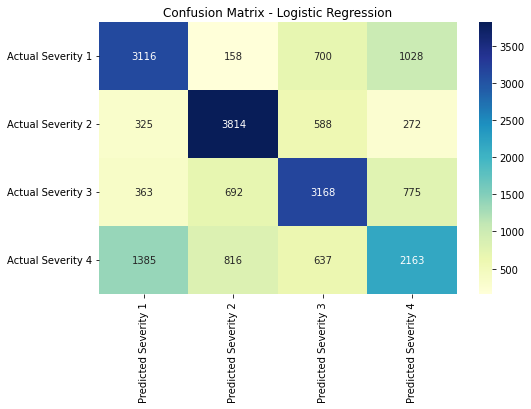

In [ ]:
y_pred = lr.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [41]:
parameters = [{"kernel": ["poly", "sigmoid"],"C": [.8, 1.], "degree": [ 3, 4]}]
svc = svm.SVC(verbose=5, random_state=42)
grid = GridSearchCV(svc, parameters, verbose=5, n_jobs=-1)

grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LibSVM]Best parameters scores:
{'C': 0.8, 'degree': 3, 'kernel': 'poly'}
Train score: 0.8568875
Validation score: 0.73895


In [ ]:
y_pred = svc.predict(X_test)

accuracy["SVM"] = accuracy_score(y_test, y_pred)
f1["SVM"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, svc.predict(X_train)))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred = svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()

In [ ]:
dtc = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(dtc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters scores:
{'criterion': 'entropy', 'max_depth': 10}
Train score: 0.8587875
Validation score: 0.83405


In [ ]:
y_pred = dtc.predict(X_test)

accuracy["Decision Tree"] = accuracy_score(y_test, y_pred)
f1["Decision Tree"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, dtc.predict(X_train)))
print(classification_report(y_test, y_pred))

NotFittedError: ignored

In [ ]:
y_pred = dtc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
grid = GridSearchCV(rfc, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters scores:
{'max_depth': 30, 'n_estimators': 200}
Train score: 0.9998875
Validation score: 0.82615


In [ ]:
y_pred = rfc.predict(X_test)

accuracy["Random Forest"] = accuracy_score(y_test, y_pred)
f1["Random Forest"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, rfc.predict(X_train)))
print(classification_report(y_test, y_pred))

NameError: ignored

In [ ]:
y_pred = rfc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

index = ["Actual Severity 1", "Actual Severity 2", "Actual Severity 3", "Actual Severity 4"]
columns = ["Predicted Severity 1", "Predicted Severity 2", "Predicted Severity 3", "Predicted Severity 4"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [43]:
knn= KNeighborsClassifier(n_jobs=-1)
parameters = [{"leaf_size": [50, 100], "weights": ["uniform", "distance"], "algorithm":["ball_tree", "kd_tree", "brute"]}]
grid = GridSearchCV(knn, parameters, verbose=5, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best parameters scores:")
print(grid.best_params_)
print("Train score:", grid.score(X_train, y_train))
print("Validation score:", grid.score(X_test, y_test))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters scores:
{'algorithm': 'ball_tree', 'leaf_size': 50, 'weights': 'uniform'}
Train score: 0.773175
Validation score: 0.64285


In [ ]:
y_train.shape

(1898582,)

In [ ]:
inputs = tf.keras.Input(shape=(X.shape[1],))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
x = tf.keras.layers.Dense(8, activation='relu')(x)


outputs = tf.keras.layers.Dense(4, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='SGD',
    loss='mse',
    metrics=['accuracy']
    
)

batch_size = 64
epochs = 30

history = model.fit(
    X_train,
    y_train,
    validation_split=0.3,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau(),
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ]
)

Epoch 1/30
20766/20766 [==============================] - 53s 2ms/step - loss: 3.0014 - accuracy: 0.2496 - val_loss: 2.9968 - val_accuracy: 0.2510 - lr: 0.0100
Epoch 2/30
20766/20766 [==============================] - 60s 3ms/step - loss: 3.0014 - accuracy: 0.2496 - val_loss: 2.9968 - val_accuracy: 0.2510 - lr: 0.0100
Epoch 3/30
20766/20766 [==============================] - 53s 3ms/step - loss: 3.0014 - accuracy: 0.2496 - val_loss: 2.9968 - val_accuracy: 0.2510 - lr: 0.0100
Epoch 4/30
20766/20766 [==============================] - 56s 3ms/step - loss: 3.0014 - accuracy: 0.2496 - val_loss: 2.9968 - val_accuracy: 0.2510 - lr: 0.0100


In [ ]:
print("Test Accuracy:", model.evaluate(X_test, y_test, verbose=0)[1])

Test Accuracy: 0.7763618230819702


In [ ]:
model6= AdaBoostClassifier()
search_grid= {'n_estimators':[1000,2000,3000], 'learning_rate':[0.0001, 0.001, 0.01, 0.1],
              "algorithm" : ["SAMME","SAMME.R"]}
gridAda = GridSearchCV(model6,param_grid = search_grid,verbose=5, n_jobs=-1)
gridAda.fit(X_train,y_train)
print("Best parameters scores:")
print(gridAda.best_params_)
print("Train score:", gridAda.score(X_train, y_train))
print("Validation score:", gridAda.score(X_test, y_test))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters scores:
{'algorithm': 'SAMME.R', 'learning_rate': 0.0001, 'n_estimators': 2000}
Train score: 0.96
Validation score: 0.15838984904834827


In [ ]:
y_pred = model.predict(X_test)

accuracy["Logistic Regression"] = accuracy_score(y_test, y_pred)
f1["Logistic Regression"] = f1_score(y_test, y_pred, average="macro")

print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      8501
           2       0.94      1.00      0.97    711553
           3       0.00      0.00      0.00     10976
           4       0.00      0.00      0.00     23398

    accuracy                           0.94    754428
   macro avg       0.24      0.25      0.24    754428
weighted avg       0.89      0.94      0.92    754428

              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2124
           2       0.94      1.00      0.97    178075
           3       0.00      0.00      0.00      2737
           4       0.00      0.00      0.00      5671

    accuracy                           0.94    188607
   macro avg       0.24      0.25      0.24    188607
weighted avg       0.89      0.94      0.92    188607



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def get_years(data, column):
    return data[column].apply(lambda date: date[0:4])

def get_months(data, column):
    return data[column].apply(lambda date: date[5:7])

In [ ]:
null_columns = ['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)']

df = df.drop(null_columns, axis=1)



In [ ]:
# Class count
count_class_1, count_class_2, count_class_3, count_class_4  = df.Severity.value_counts()

# Divide by class
df_class_1 = df[df['Severity'] == 1]
df_class_2 = df[df['Severity'] == 2]
df_class_3 = df[df['Severity'] == 3]
df_class_4 = df[df['Severity'] == 4]

In [ ]:
count_class_1, count_class_2,count_class_3, count_class_4

(593284, 13946, 8749, 7242)

In [ ]:
count_class_3

13713

In [ ]:
# Undersample 0-class and concat the DataFrames of both class
df_class_1_under = df_class_1.sample(count_class_4)
df_class_2_under = df_class_2.sample(count_class_4)
df_class_3_under = df_class_3.sample(count_class_4)
df_test_under = pd.concat([df_class_1_under, df_class_2_under, df_class_3_under, df_class_4], axis=0)


print('Random under-sampling:')
print(df_test_under.Severity.value_counts())

Random under-sampling:
4    29069
1    10625
2    10625
3    10625
Name: Severity, dtype: int64
